In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# chamando a base para visualização dos dados em tabela
base = pd.read_csv('Cities1.csv')

base

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


In [30]:
# Verificando valores nulos
print(base['WaterPollution'].isnull().sum())

0


In [43]:
paises_analisados = set()

for pais in base["Country"]:
  # Filtra o país atual
  country_data = base[base["Country"] == pais]
  # Verifica se a média da poluição da água é próxima a 0
  if country_data["WaterPollution"].mean() <= 0.01:
    if pais not in paises_analisados:
      print(f"O país {pais} possui poluição da água próxima a 0.")
      paises_analisados.add(pais)

O país Liechtenstein possui poluição da água próxima a 0.
O país Palau possui poluição da água próxima a 0.


In [46]:
# Soma a quantidade de vezes que um país apareceu com a sua quantidade de poluição de água e faz a média 
paises_agrupados = base.groupby("Country")["WaterPollution"].mean()

print("Poluição Marinha em cada País:\n")

for pais, total in paises_agrupados.items():
    print(f"{pais} - {total:.2f}")

Poluição Marinha em cada País:

Afghanistan - 53.44
Albania - 57.83
Algeria - 50.62
Andorra - 25.00
Angola - 81.25
Argentina - 54.28
Armenia - 45.00
Australia - 31.98
Austria - 37.73
Azerbaijan - 69.02
Bahrain - 62.47
Bangladesh - 59.12
Barbados - 46.67
Belarus - 42.50
Belgium - 48.91
Belize - 70.49
Benin - 100.00
Bhutan - 55.00
Bolivia - 74.57
Bosnia and Herzegovina - 45.75
Botswana - 56.25
Brazil - 52.75
Brunei - 74.43
Bulgaria - 42.78
Burundi - 87.50
Cambodia - 67.03
Cameroon - 72.13
Canada - 32.55
Central African Republic - 100.00
Chad - 26.39
Chile - 48.02
Colombia - 53.53
Costa Rica - 35.81
Cote d'Ivoire - 79.41
Croatia - 24.54
Cuba - 75.00
Cyprus - 39.12
Czech Republic - 41.43
Djibouti - 54.17
Dominican Republic - 63.76
Ecuador - 62.60
Egypt - 63.01
El Salvador - 76.56
Equatorial Guinea - 53.33
Eritrea - 25.00
Estonia - 28.31
Eswatini - 52.08
Ethiopia - 64.85
Federated States of Micronesia - 100.00
Fiji - 78.97
Finland - 19.23
France - 34.77
Gabon - 87.50
Georgia - 54.61
Germany

In [45]:
# Em ordem decrescente, do maior para o menor, mostra qual os pa´ises com maior poluição na água
paises_maior_poluicao = dict(sorted(paises_agrupados.items(), key=lambda item: item[1], reverse=True))

print("Poluição Marinha em cada País:\n")

# Print the sorted data
for pais, total in paises_maior_poluicao.items():
    print(f"{pais} - {total:.2f}")

Poluição Marinha em cada País:

Benin - 100.00
Central African Republic - 100.00
Federated States of Micronesia - 100.00
Niger - 100.00
Sierra Leone - 100.00
Guinea - 93.75
Maldives - 93.75
Marshall Islands - 91.67
Lebanon - 90.76
Burundi - 87.50
Gabon - 87.50
Laos - 85.56
Yemen - 85.42
Solomon Islands - 84.72
Angola - 81.25
Republic of the Congo - 81.25
Zambia - 80.77
Lesotho - 80.00
Mozambique - 79.69
Cote d'Ivoire - 79.41
Fiji - 78.97
Venezuela - 78.55
Madagascar - 77.45
El Salvador - 76.56
Honduras - 76.26
Cuba - 75.00
Moldova - 75.00
South Sudan - 75.00
Togo - 75.00
Bolivia - 74.57
Brunei - 74.43
Zimbabwe - 74.11
Iraq - 72.54
Cameroon - 72.13
Mauritius - 71.73
Nigeria - 71.30
Belize - 70.49
Vanuatu - 70.00
Kazakhstan - 69.65
Papua New Guinea - 69.23
Ghana - 69.15
Azerbaijan - 69.02
Haiti - 68.75
Liberia - 68.75
Timor-Leste - 68.75
Pakistan - 67.89
Cambodia - 67.03
Nicaragua - 67.00
Guatemala - 66.03
Philippines - 65.77
Syria - 65.60
Vietnam - 65.53
Guyana - 65.28
Ethiopia - 64.85


In [47]:
# lista de países localizados na América Latina
paises_latinos = [
    "Brazil",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Dominican Republic",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Uruguay",
    "Venezuela",
]

poluicaoAguaPaisesLatinos = base[base["Country"].isin(paises_latinos)]

# Pega a média de poluição na água que estão concentradas nos países latinos
poluicao_paises_latinos = poluicaoAguaPaisesLatinos.groupby("Country")["WaterPollution"].mean()

for pais, total in poluicao_paises_latinos.items():
    print(f"País: {pais} - {total:.2f}")

País: Brazil - 52.75
País: Colombia - 53.53
País: Costa Rica - 35.81
País: Cuba - 75.00
País: Dominican Republic - 63.76
País: Ecuador - 62.60
País: El Salvador - 76.56
País: Guatemala - 66.03
País: Haiti - 68.75
País: Honduras - 76.26
País: Mexico - 49.55
País: Nicaragua - 67.00
País: Panama - 44.30
País: Paraguay - 33.50
País: Peru - 60.57
País: Uruguay - 30.01
País: Venezuela - 78.55


In [48]:
# Em ordem decrescente, do maior para o menor, mostra qual os paises latinos com maior poluição na água
latinos_maior_poluicao = dict(sorted(poluicao_paises_latinos.items(), key=lambda item: item[1], reverse=True))

print("Poluição Marinha em ordem decrescente de países latinos:\n")

# Print the sorted data
for pais, total in latinos_maior_poluicao.items():
    print(f"{pais} - {total:.2f}")

Poluição Marinha em ordem decrescente de países latinos:

Venezuela - 78.55
El Salvador - 76.56
Honduras - 76.26
Cuba - 75.00
Haiti - 68.75
Nicaragua - 67.00
Guatemala - 66.03
Dominican Republic - 63.76
Ecuador - 62.60
Peru - 60.57
Colombia - 53.53
Brazil - 52.75
Mexico - 49.55
Panama - 44.30
Costa Rica - 35.81
Paraguay - 33.50
Uruguay - 30.01


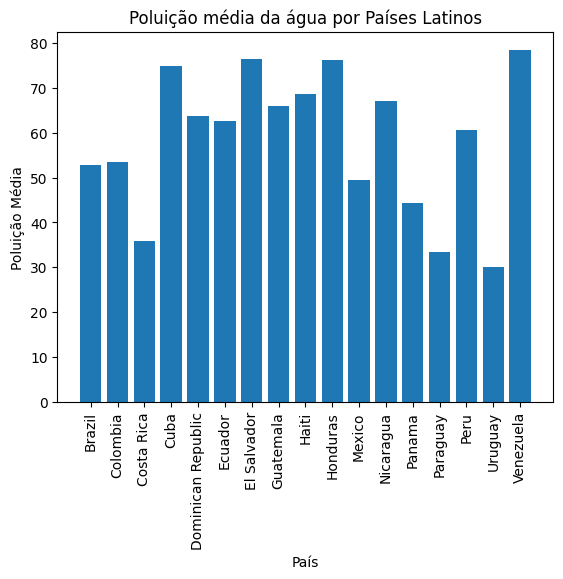

In [14]:
# Gráfico de barras 
plt.bar(poluicao_paises_latinos.index, poluicao_paises_latinos.values)

# Adicione rótulos aos eixos
plt.xlabel("País")
plt.ylabel("Poluição Média")
plt.title("Poluição média da água por Países Latinos")

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibe o gráfico
plt.show()

In [ ]:
# Brasil e países considerados desenvolvidos


In [11]:
poluicao_brasil = base[(base["Country"] == "Brazil")]

# Agrupa então a poluição do brasil de cada região/Estado e faz a média
grouped_data = poluicao_brasil.groupby("Region")["WaterPollution"].mean()

print("Poluição Marinha em cada Estado do Brasil:\n")

for cidade, total in grouped_data.items():
    print(f"Estado: {cidade} - {total:.2f}")

Estado: Amazonas - 46.43
Estado: Bahia - 71.27
Estado: Ceara - 56.94
Estado: Espirito Santo - 67.92
Estado: Federal District - 38.04
Estado: Goias - 39.58
Estado: Maranhao - 100.00
Estado: Mato Grosso - 37.50
Estado: Mato Grosso do Sul - 66.07
Estado: Minas Gerais - 47.26
Estado: Para - 93.75
Estado: Paraiba - 43.75
Estado: Parana - 33.41
Estado: Pernambuco - 63.10
Estado: Piaui - 75.00
Estado: Rio Grande do Norte - 59.09
Estado: Rio Grande do Sul - 62.18
Estado: Rio de Janeiro - 62.82
Estado: Rondonia - 50.00
Estado: Roraima - 58.33
Estado: Santa Catarina - 54.37
Estado: Sao Paulo - 42.63


In [9]:
# Pega então a base de cada cidade localizada no estado de São Paulo e faz a média baseada na poluição da água
poluicao_SP = base[(base["Region"] == "Sao Paulo")]
grouped_data = poluicao_SP.groupby("City")["WaterPollution"].mean()

print("Poluição Marinha em cada Cidade de São Paulo:\n")

for city, total in grouped_data.items():
    print(f"{city} - {total:.2f}")

Poluição Marinha em cada País:

Americana - 75.00
Aracatuba - 0.00
Araraquara - 50.00
Atibaia - 25.00
Barueri - 50.00
Bauru - 50.00
Campinas - 48.33
Catanduva - 50.00
Diadema - 75.00
Embu das Artes - 50.00
Franca - 50.00
Guarulhos - 21.88
Indaiatuba - 31.25
Itapetininga - 50.00
Jundiai - 5.00
Limeira - 75.00
Marilia - 0.00
Mogi das Cruzes - 20.00
Osasco - 66.67
Piracicaba - 25.00
Praia Grande - 100.00
Presidente Prudente - 12.50
Ribeirao Preto - 61.11
Rio Claro - 50.00
Santo Andre - 0.00
Santos - 18.75
Sao Bernardo do Campo - 66.67
Sao Caetano do Sul - 50.00
Sao Carlos - 45.00
Sao Jose dos Campos - 26.47
Sao Paulo - 73.72
Sorocaba - 41.67


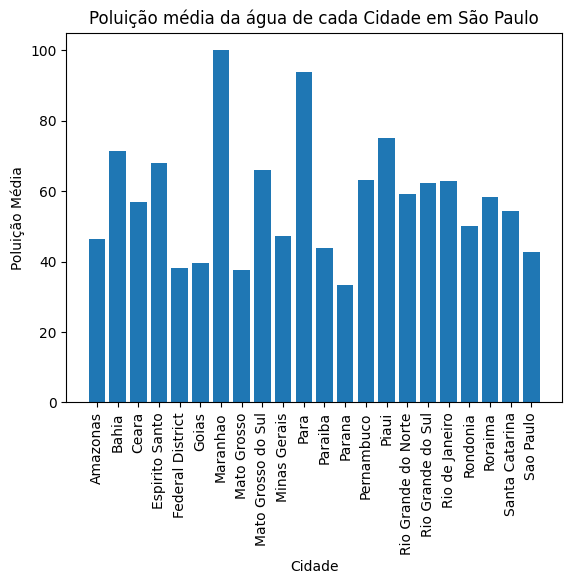

In [15]:
# Crie um gráfico de barras
plt.bar(grouped_data.index, grouped_data.values)

# Adicione rótulos aos eixos
plt.xlabel("Cidade")
plt.ylabel("Poluição Média")
plt.title("Poluição média da água de cada Cidade em São Paulo")

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibe o gráfico
plt.show()